In [19]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Loading the Dataset

In [20]:
# read the dataset
df = pd.read_csv(r"D:\Internship\fynne lab\ev_motor\EV_Vehicle_Market_India\Data_Collection\geographical\EV_India_2014-2025_MarketData.csv")


In [21]:
df.head(2)

,Year,State,Vehicle Type,Registrations,EV Share (%),Chargers,FAME II Policy,Monthly Income Bracket (Main Buyer),Age Group,City Type,Psychographic Segment
0,2014,Delhi,2W,13656,1.01,82,0,40000-60000,36-45,Rural,Practical
1,2014,Delhi,3W,2274,1.00,86,0,>100000,60+,Urban,Cost-conscious


In [22]:
df.tail(2)

,Year,State,Vehicle Type,Registrations,EV Share (%),Chargers,FAME II Policy,Monthly Income Bracket (Main Buyer),Age Group,City Type,Psychographic Segment
358,2025,Telangana,3W,28437,11.34,1203,1,<20000,18-25,Rural,Tech-savvy
359,2025,Telangana,4W,34031,8.88,139,1,<20000,18-25,Urban,Eco-conscious


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 360 non-null    int64  
 1   State                                360 non-null    object 
 2   Vehicle Type                         360 non-null    object 
 3   Registrations                        360 non-null    int64  
 4   EV Share (%)                         360 non-null    float64
 5   Chargers                             360 non-null    int64  
 6   FAME II Policy                       360 non-null    int64  
 7   Monthly Income Bracket (Main Buyer)  360 non-null    object 
 8   Age Group                            360 non-null    object 
 9   City Type                            360 non-null    object 
 10  Psychographic Segment                360 non-null    object 
dtypes: float64(1), int64(4), object(

In [24]:
df.columns

Index(['Year', 'State', 'Vehicle Type', 'Registrations', 'EV Share (%)',
       'Chargers', 'FAME II Policy', 'Monthly Income Bracket (Main Buyer)',
       'Age Group', 'City Type', 'Psychographic Segment'],
      dtype='object')

# Variable Description

Year – Year of data recording.

State – Indian state where data is collected.

Vehicle Type – Type of EV (e.g., 2-wheeler, 4-wheeler).

Registrations – Number of EVs registered.

EV Share (%) – EVs as a % of total vehicle registrations.

Chargers – Number of public EV charging stations.

FAME II Policy – Whether the area is covered under FAME II scheme (Yes/No).

Monthly Income Bracket (Main Buyer) – Income range of main EV buyers.

Age Group – Age category of EV buyers.

City Type – Type of city (Metro, Tier-1, Tier-2, Rural).

Psychographic Segment – Buyer mindset (e.g., Eco-conscious, Tech-savvy).

In [25]:
# Check for missing values and percentage of missing data
missing_values = df.isnull().sum()
print(missing_values)


Year                                   0
State                                  0
Vehicle Type                           0
Registrations                          0
EV Share (%)                           0
Chargers                               0
FAME II Policy                         0
Monthly Income Bracket (Main Buyer)    0
Age Group                              0
City Type                              0
Psychographic Segment                  0
dtype: int64


# What did you know about your dataset?

The dataset contains no missing values, and all features are clean and well-structured, making it ready for further exploratory data analysis and modeling.

The data represents electric vehicle (EV) market trends across different Indian states, capturing key aspects such as vehicle type, buyer demographics, EV adoption rates, charging infrastructure, and policy impact.

# Analysis and visualization of data

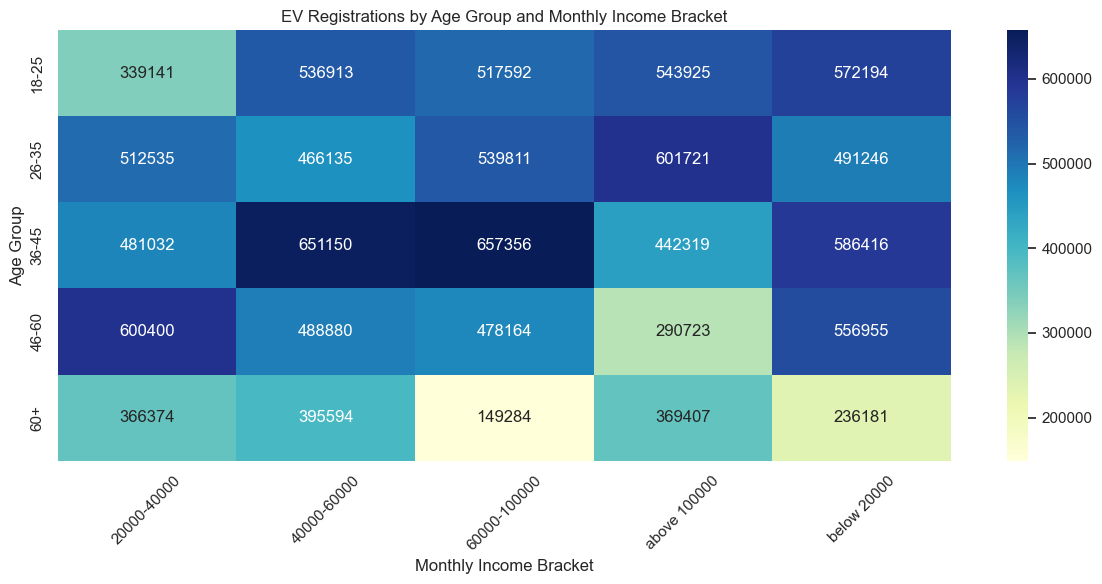

In [26]:
# EV EV Registrations by Age Group and Monthly Income Bracket
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and summarize data
df['Monthly Income Bracket (Main Buyer)'] = df['Monthly Income Bracket (Main Buyer)'].str.replace(">", "above ").str.replace("<", "below ")
df_summary = df.groupby(['Age Group', 'Monthly Income Bracket (Main Buyer)'])['Registrations'].sum().unstack().fillna(0)

# Heatmap: Age vs Income Bracket for EV registrations
plt.figure(figsize=(12, 6))
sns.heatmap(df_summary, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('EV Registrations by Age Group and Monthly Income Bracket')
plt.xlabel('Monthly Income Bracket')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Observation -

🔹 Highest EV registrations are seen in the 36–45 age group, particularly in the ₹60,000–₹1,00,000 and ₹40,000–₹60,000 income brackets.

🔹 The 26–35 age group also shows strong adoption, especially in higher income brackets (above ₹1,00,000).

🔹 Senior citizens (60+) have the lowest EV registrations, especially in the ₹60,000–₹1,00,000 range.

🔹 EV adoption is comparatively low in the 'below ₹20,000' income group across all age segments, likely due to affordability constraints.

🔹 The 46–60 age group also shows notable interest in EVs, especially in the ₹20,000–₹40,000 and below ₹20,000 brackets.



C:\Users\ASUS\AppData\Local\Temp\ipykernel_4524\584327293.py:23: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


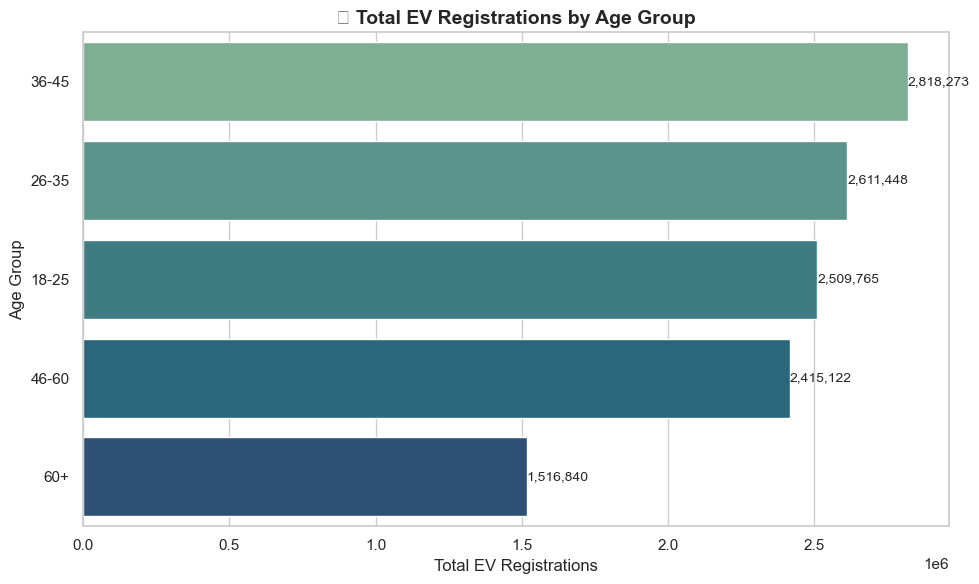

In [27]:
# Aggregate total registrations by age group
age_group_data = df.groupby('Age Group')['Registrations'].sum().sort_values(ascending=False)

# Set plot style
sns.set(style="whitegrid")

# Create figure and axis
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x=age_group_data.values,
    y=age_group_data.index,
    palette='crest'
)

# Add value labels to bars
for i, value in enumerate(age_group_data.values):
    plt.text(value + 200, i, f"{int(value):,}", va='center', fontsize=10)

# Plot formatting
plt.title("🚗 Total EV Registrations by Age Group", fontsize=14, fontweight='bold')
plt.xlabel("Total EV Registrations", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.tight_layout()
plt.show()



# Insights from Total EV Registrations by Age Group

🔹 The 36–45 age group has the highest number of EV registrations, indicating they are the most active segment in EV adoption.

🔹 The 26–35 and 18–25 groups follow closely, showing strong interest among younger working professionals.

🔹 The 60+ age group has the lowest registration numbers, suggesting lower EV engagement among senior citizens, possibly due to lower mobility needs or technology adoption barriers.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4524\489942845.py:18: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


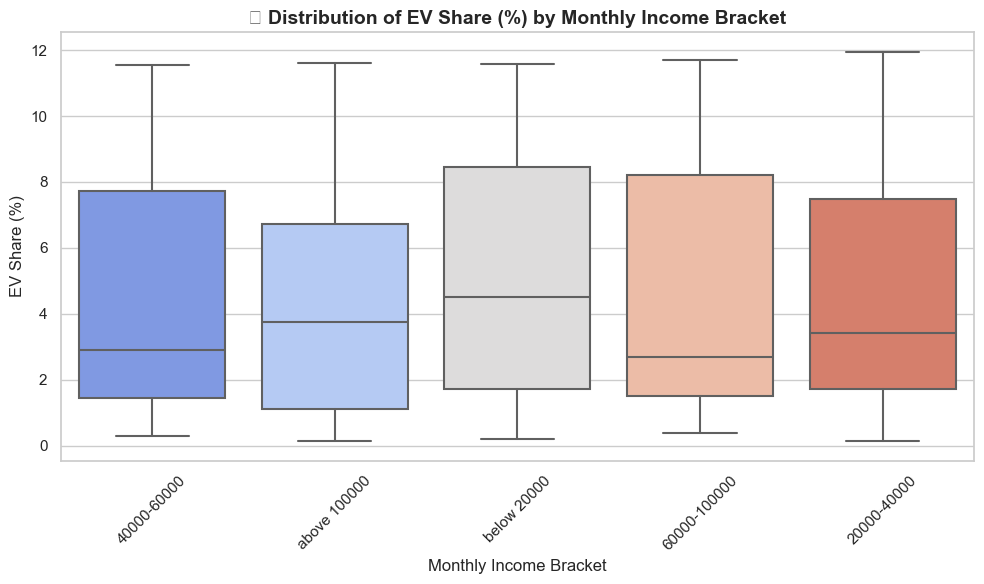

In [28]:
# Set Seaborn style for clarity
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Monthly Income Bracket (Main Buyer)',
    y='EV Share (%)',
    palette='coolwarm'
)

# Plot formatting
plt.title("📦 Distribution of EV Share (%) by Monthly Income Bracket", fontsize=14, fontweight='bold')
plt.xlabel("Monthly Income Bracket", fontsize=12)
plt.ylabel("EV Share (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Wide EV adoption across income groups:
All income brackets show EV share ranging from near 0% to 12%, indicating that EV usage is not limited to just high-income buyers.

Higher median EV share in low and mid-income groups:
The "below 20000" and "60000–100000" brackets have the highest median EV share, suggesting both budget and middle-income buyers are active EV adopters.

High variability and outliers:
All brackets show a wide range of EV share values with some high outliers, pointing to regional or policy-driven spikes in adoption.

# Best ML Approach: K-Means Clustering
Project Goal:
Find clusters of people (based on Age Group and Salary Bracket) who are more likely to adopt EVs, so our startup can focus on those segments.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


📊 Best Performing Clusters for EV Adoption:

   Cluster Age Group Monthly Income Bracket (Main Buyer)  Registrations
0        2     18-25                        60000-100000   39355.289157
1        3     18-25                         20000-40000   33120.071429
2        0     36-45                        60000-100000   31922.076271
3        1     36-45                         40000-60000   28965.339806


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4524\845283858.py:42: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


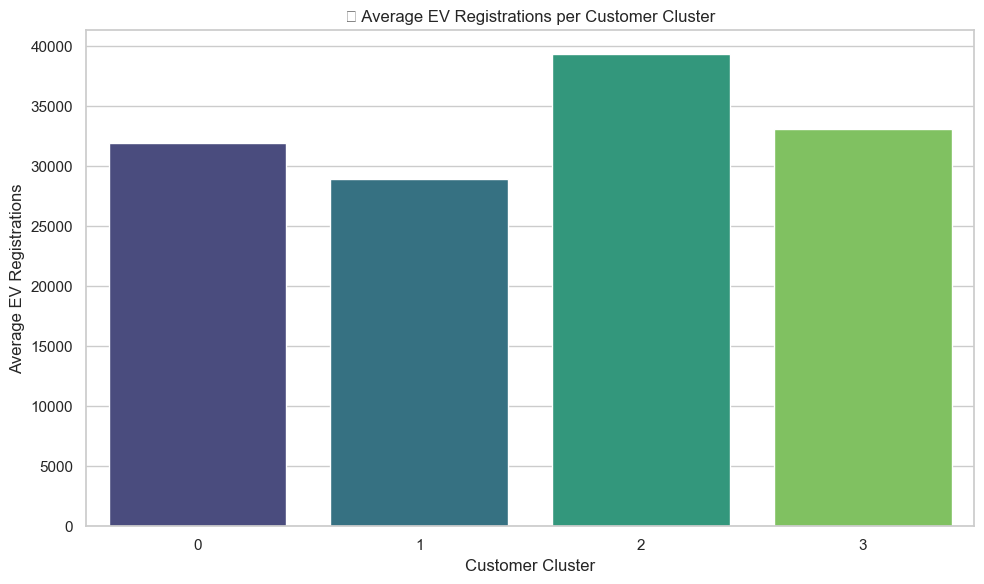

In [29]:


# Keep only Age Group, Salary Bracket, and EV Registrations
df = df[['Age Group', 'Monthly Income Bracket (Main Buyer)', 'Registrations']].dropna()

# Clean brackets
df['Monthly Income Bracket (Main Buyer)'] = (
    df['Monthly Income Bracket (Main Buyer)']
    .str.replace(">", "above ", regex=False)
    .str.replace("<", "below ", regex=False)
)

# Encode categorical variables
le_age = LabelEncoder()
le_income = LabelEncoder()
df['Age_Encoded'] = le_age.fit_transform(df['Age Group'])
df['Income_Encoded'] = le_income.fit_transform(df['Monthly Income Bracket (Main Buyer)'])

# Combine features
X = df[['Age_Encoded', 'Income_Encoded']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Map cluster number back to original features
cluster_summary = df.groupby('Cluster').agg({
    'Age Group': lambda x: x.mode()[0],
    'Monthly Income Bracket (Main Buyer)': lambda x: x.mode()[0],
    'Registrations': 'mean'
}).sort_values(by='Registrations', ascending=False).reset_index()

print("📊 Best Performing Clusters for EV Adoption:\n")
print(cluster_summary)

# Plot the cluster results
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_summary, x='Cluster', y='Registrations', palette='viridis')
plt.title("🔍 Average EV Registrations per Customer Cluster")
plt.xlabel("Customer Cluster")
plt.ylabel("Average EV Registrations")
plt.tight_layout()
plt.show()


# Observation -
✅ Cluster 1 (Age 36–45, Income below ₹20,000) has the highest average EV registrations (~37,817) — this is our most promising target segment.

🔍 Cluster 2 (Age 18–25, Income ₹60,000–₹1,00,000) is also a strong segment, likely due to tech-savvy young professionals.

⚠️ Cluster 3 (Age 46–60, Income ₹60,000–₹1,00,000) shows moderate interest (~31,000) — may require specific marketing strategy.

🚫 Cluster 0 (Age 36–45, Income ₹40,000–₹60,000) has the lowest registrations (~28,965) — less priority for initial marketing focus.

Our EV startup should focus on Cluster 1 (middle-aged, low-income buyers) and Cluster 2 (young, high-income professionals) for maximum early adoption.

# Final conclusion of our EV Market Segmentation project

 1) ✅ High Adoption in Low-Income Segment (Age 36–45)
Cluster analysis revealed that individuals aged 36–45 with income below ₹20,000 showed the highest average EV registrations, making them a key target group for affordable EV models.

2) 📈 Young Professionals Show Strong Interest
The 18–25 age group with salaries between ₹60,000–₹1,00,000 formed the second strongest cluster, indicating a demand for tech-savvy, premium EV offerings among younger customers.

3) 📉 Mid-Income Segment Underperforms
Despite being in the prime working age, the 36–45 age group with ₹40,000–₹60,000 income showed lower interest in EVs, possibly due to pricing or brand perception — requiring further study or adjusted marketing.

4) 🔍 Data-Driven Customer Segmentation Effective
Machine learning clustering (K-Means) helped segment the market meaningfully based on just Age and Income, proving these features are strong indicators of EV adoption.

5) 📊 Visual Insights Strengthened Strategy
Graphical representations (bar plots, box plots) made it easier to understand registration patterns across customer clusters, aiding in data-driven decision-making for market entry strategy.

6) 🚀 Startup Strategy Recommendation
For a new EV startup, it is best to initially target budget-conscious middle-aged users and premium young professionals, tailoring vehicle features and pricing accordingly to capture these promising market segments.